In [4]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
# read file
df = pd.read_csv(r"C:\Users\rsele\OneDrive\Data Science\Projekt\ML_with_SQL_Tableau\data\raw\aug_train.csv")


In [6]:
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [107]:
# Check datatype per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  19093 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            19093 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            19093 non-null  object 
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [95]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'unknown'],
      dtype=object)

In [100]:
# Count observations where experience is unknown
df[df.experience=="unknown"].count()

enrollee_id               65
city                      65
city_development_index    65
gender                    65
relevent_experience       65
enrolled_university       65
education_level           65
major_discipline          65
experience                65
company_size              65
company_type              65
last_new_job              65
training_hours            65
target                    65
dtype: int64

In [114]:
# Drop unknown experiences since there are only 65. Convert years of experiences to int
df.drop(df.index[df["experience"] == "unknown"], inplace = True)
df.replace(">20","20",inplace=True)
df.replace("<1","0",inplace=True)
df["experience"] = pd.to_numeric(df["experience"])
df.experience.unique()

array([20, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8], dtype=int64)

In [115]:
# Check for NANs
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
# Fill NAN with unknown 
df.fillna("unknown",inplace=True)

In [116]:
df.shape

(19093, 14)

In [117]:
df.describe()


enrollee_id  city_development_index    experience  training_hours  \
count  19093.000000            19093.000000  19093.000000    19093.000000   
mean   16879.498298                0.829045      9.928036       65.345257   
std     9621.168849                0.123260      6.505268       60.051868   
min        1.000000                0.448000      0.000000        1.000000   
25%     8553.000000                0.740000      4.000000       23.000000   
50%    16988.000000                0.903000      9.000000       47.000000   
75%    25189.000000                0.920000     16.000000       88.000000   
max    33380.000000                0.949000     20.000000      336.000000   

             target  
count  19093.000000  
mean       0.248992  
std        0.432440  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Text(0.5, 1.0, 'Distribution of gender')

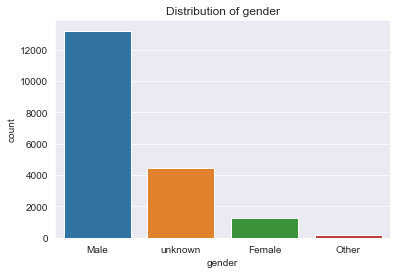

In [118]:
sns.set_style("darkgrid")
sns.countplot(x=df.gender).set_title("Distribution of gender")

Text(0.5, 1.0, 'Distribution of education')

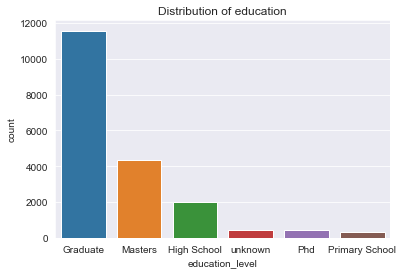

In [119]:
sns.countplot(x=df.education_level).set_title("Distribution of education")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of training hours')

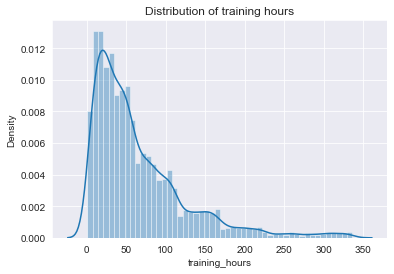

In [120]:
sns.distplot(df.training_hours).set_title("Distribution of training hours")

Text(0.5, 1.0, 'Distribution of training hours per education level')

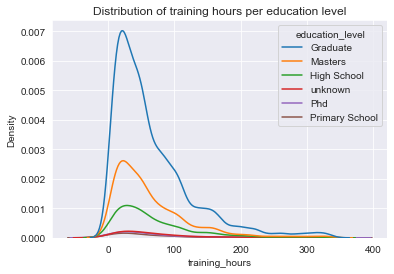

In [121]:
sns.kdeplot(data=df, x="training_hours",hue="education_level").set_title("Distribution of training hours per education level")


Text(0.5, 1.0, 'Distribution of training hours per gender')

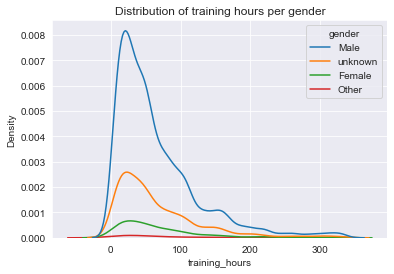

In [122]:
sns.kdeplot(data=df, x="training_hours",hue="gender").set_title("Distribution of training hours per gender")

In [139]:
sns.boxplot(df.training_hours).set_title("Boxplot of training hours")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of training hours')

Text(0.5, 1.0, 'Distribution of experience')

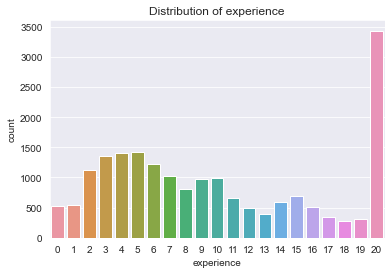

In [123]:
sns.countplot(x=df.experience).set_title("Distribution of experience")

In [129]:
sns.countplot(x=df.company_size,hue=df.relevent_experience).set_title("Distribution of experience")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, '50-99'),
  Text(2, 0, '<10'),
  Text(3, 0, '10000+'),
  Text(4, 0, '5000-9999'),
  Text(5, 0, '1000-4999'),
  Text(6, 0, '10/49'),
  Text(7, 0, '100-500'),
  Text(8, 0, '500-999')])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Arts'),
  Text(4, 0, 'Humanities'),
  Text(5, 0, 'No Major'),
  Text(6, 0, 'Other')])

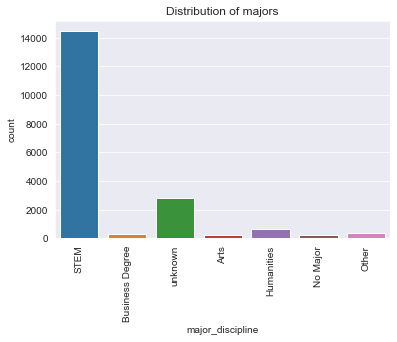

In [132]:
sns.countplot(x=df.major_discipline).set_title("Distribution of majors")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'no_enrollment'),
  Text(1, 0, 'Full time course'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Part time course')])

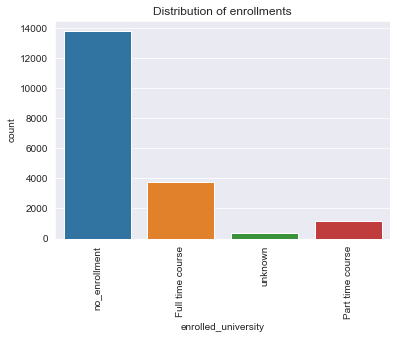

In [134]:
sns.countplot(x=df.enrolled_university).set_title("Distribution of enrollments")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Scatter plot of the relation between training hours and city development')

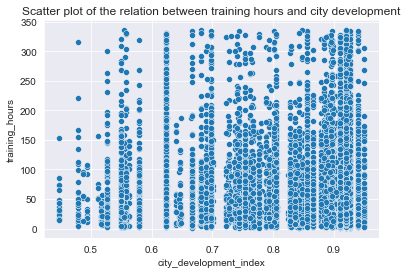

In [146]:
sns.scatterplot(x=df.city_development_index, y=df.training_hours).set_title("Scatter plot of the relation between training hours and city development")

Text(0.5, 1.0, 'Lineplot of the relation between training hours and city development')

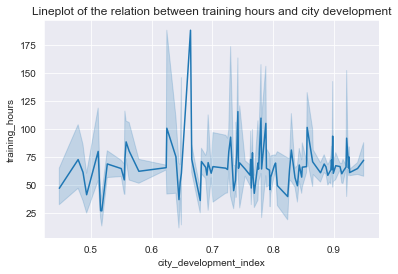

In [147]:
sns.lineplot(x=df.city_development_index, y=df.training_hours).set_title("Lineplot of the relation between training hours and city development")

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

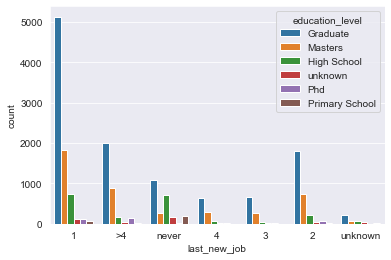

In [154]:
sns.countplot(x=df.last_new_job,hue=df.education_level)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

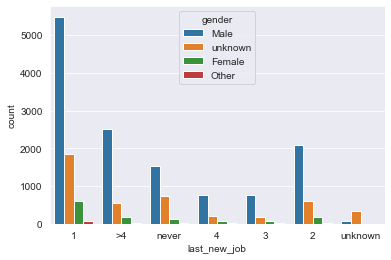

In [155]:
sns.countplot(x=df.last_new_job,hue=df.gender)

In [159]:
# Replacing strings with integers and treating unknown values as 0
df.last_new_job.replace(">4","4",inplace=True)
df.last_new_job.replace("never","0",inplace=True)
df.last_new_job.replace("unknown","0",inplace=True)
df.last_new_job = pd.to_numeric(df.last_new_job)

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time in years since last job change')

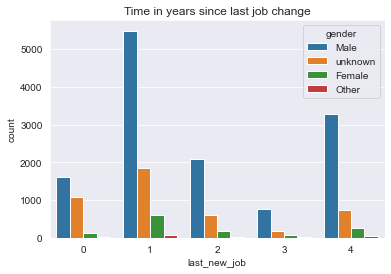

In [165]:
sns.countplot(df.last_new_job,hue=df.gender).set_title("Time in years since last job change")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

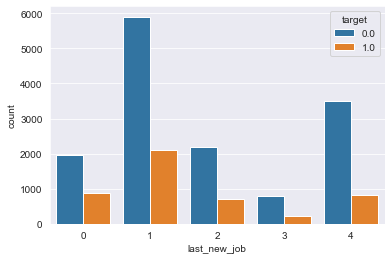

In [169]:
sns.countplot(df.last_new_job,hue=df.target)

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People looking for new jobs based on Education')

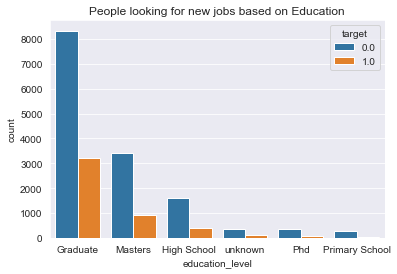

In [177]:
sns.countplot(df.education_level,hue=df.target).set_title("People looking for new jobs based on Education")

Text(0.5, 1.0, 'Distribution of people looking for new jobs based on their time in the current job')

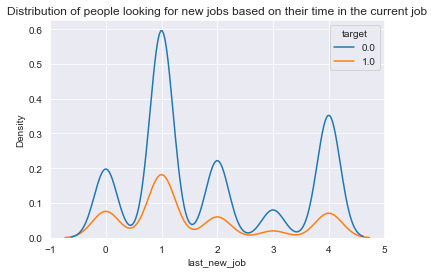

In [173]:
sns.kdeplot(df.last_new_job,hue=df.target).set_title("Distribution of people looking for new jobs based on their time in the current job")

Text(0.5, 1.0, 'People looking for new jobs based on city development')

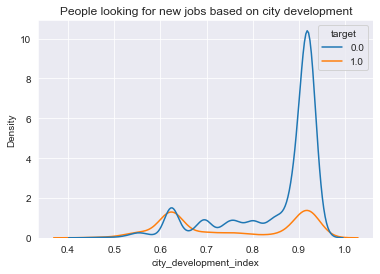

In [180]:
sns.kdeplot(df.city_development_index,hue=df.target).set_title("People looking for new jobs based on city development")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Arts'),
  Text(4, 0, 'Humanities'),
  Text(5, 0, 'No Major'),
  Text(6, 0, 'Other')])

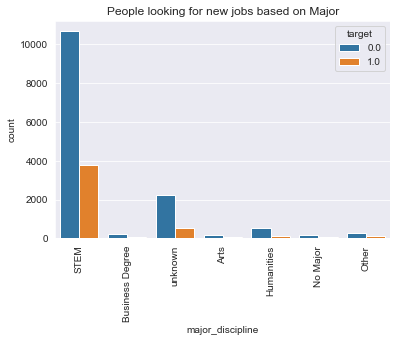

In [184]:
sns.countplot(df.major_discipline,hue=df.target).set_title("People looking for new jobs based on Major")
plt.xticks(rotation=90)

(array([-100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,
         350.,  400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

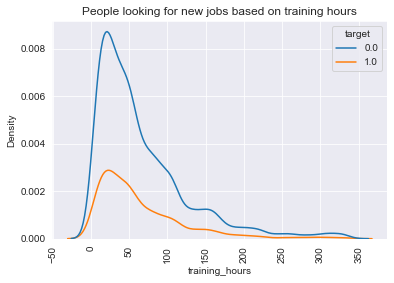

In [187]:
sns.kdeplot(df.training_hours,hue=df.target).set_title("People looking for new jobs based on training hours")
plt.xticks(rotation=90)